In [2]:
from torch import nn
import torch
import numpy as np, math

from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

# Plot of performances for 100 epochs MCMC vs Gradient

In [3]:
import matplotlib.pyplot as plt
import json
import sys


In [4]:
def evaluation(json_file,make_png=False):
    print('Evaluating file',json_file,'started---')
    results = json.load(open(json_file))
    epochs = len(results.keys())
    x = sorted([int(t) for t in results.keys()])
    ac_test = [ results[str(t)]['test']['testing accuracy'] for t in x]
    plt.figure(figsize=(100, 200))
    fig, ax = plt.subplots()
    ax.plot(x, ac_test, label="test accuracy")
    for proba in range(9):
        #print('proba=',0.1+0.1*proba)
        ac_test_sparse = [results[str(t)]['sparse test'][proba]['testing accuracy sparse'] for t in x]
        ax.plot(x, ac_test_sparse, label="sparse version "+str(proba))
    if make_png:
        plt.savefig(json_file.replace(".json","")+"_acc.png",dpi=200)
    plt.title(json_file)
    plt.show()
    return()

def ratio(json_file,make_png=False):
    print('Evaluating ratio of acceptance from file',json_file,'started---')
    results = json.load(open(json_file))
    epochs = len(results.keys())
    x = sorted([int(t) for t in results.keys()])
    acc_f = [ results[str(t)]['accept_ratio_filter'] for t in x]
    acc_l = [ results[str(t)]['accept_ratio_linear'] for t in x]
    plt.figure(figsize=(100, 200))
    fig, ax = plt.subplots()
    ax.plot(x, acc_f, label="Acceptance ratio filters")
    ax.plot(x, acc_l, label="Acceptance ratio linear")
    ax.legend(loc="upper right", frameon=False)
    if make_png:
        plt.savefig(json_file.replace(".json","")+"_acc.png",dpi=200)
    plt.title(json_file)
    plt.show()
    return()

def lossycompression(json_file,plot=True):
    print('Evaluating the lossy compression of',json_file)
    results = json.load(open(json_file))
    epochs = len(results.keys())-1
    ac_test = results[str(epochs)]['test']['testing accuracy']
    plt.figure(figsize=(100, 200))
    res = []
    for proba in range(9):
        #print('proba=',0.1+0.1*proba)
        res.append(results[str(epochs)]['sparse test'][proba]['testing accuracy sparse'])
    ratio = [1]
    ratio += [float(a)/ac_test for a in res]
    if plot:
        plt.plot(range(10),ratio)
        plt.title('lossy compression of',json_file[15:])
        plt.show()
    return(ratio)

#oldstuff

#json_file = '../results/results_cnn_gradient_proba_0.001.json'
#json_file2 = '../results/results_nets2_gradient_proba.json'
#json_file = '../results/results_cnn_gradient_sparsindex_proba_0.001.json'
#json_file = '../results/results_nets2_gradient_sparsindex_proba.json'
#json_file = '../results/results_nets2_mnist_gradient_proba.json'

#json_file = '../results/results_cnn_mcmc_proba_1000000.json'
#json_file = '../results/results_cnn_mcmc_sparsindex_proba_1000000.json'
#json_file2 = '../results/results_nets2_mcmc_proba.json'
#json_file = '../results/results_nets2_mcmc_sparsindex_proba.json'
#MCMC with 64 filters and variance 10e-8 for prior and varying neighborhood sizes
#json_file = '../results/results_nets2_mcmc_proba_fullnn.json'
#json_file = '../results/results_nets2_mcmc_proba_nn300.json'
    

In [16]:
'square' in 'square33'
int('square4'[6:])**2

16

# Gradient and MCMC analysis

Evaluating file ../results/results_nets2_mcmc_proba_nnfull_vp8.json started---


<Figure size 7200x14400 with 0 Axes>

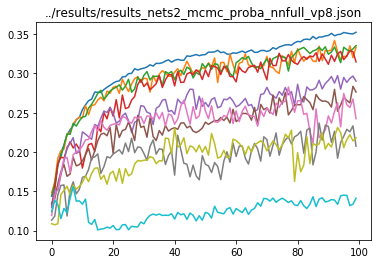

Evaluating file ../results/results_nets2_mcmc_mfmooves_n300.json started---


<Figure size 7200x14400 with 0 Axes>

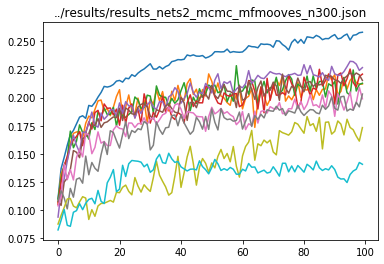

Evaluating ratio of acceptance from file ../results/results_nets2_mcmc_proba_nnfull_vp8.json started---


<Figure size 7200x14400 with 0 Axes>

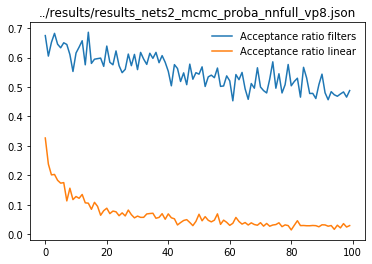

Evaluating ratio of acceptance from file ../results/results_nets2_mcmc_mfmooves_n300.json started---


<Figure size 7200x14400 with 0 Axes>

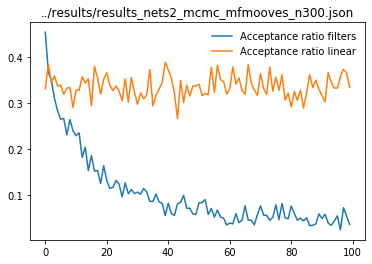

()

In [11]:
#GRADIENT XP
json_file = '../results/results_nets2_gradient_proba.json'
json_file = '../results/results_cnn_gradient_sparsindex_proba.json'
json_file = '../results/results_cnn_gradient_sparsindex_proba.json'

#evaluation('../results/results_cnn_mcmc_proba_newprior.json')

#json_file2 = '../results/results_nets2_mcmc_mfmooves.json'
json_file2 = '../results/results_nets2_mcmc_mfmooves_n300.json'
#MCMC first xp with 32 and 64 (nets2) hidden layers and variances let to 10e-10
#json_file = '../results/results_nets2_mcmc_proba_fullnn.json'
#json_file2 = '../results/results_nets2_mcmc_proba_nnfull_vp10.json'
json_file = '../results/results_nets2_mcmc_proba_nnfull_vp8.json'#**best ever with proposal variance 10-8***
#json_file = '../results/results_nets2_mcmc_mfmooves_n1000.json'
#json_file2 = '../results/results_nets2_mcmc_proba_nnfull_vp8_200epochs.json'#totest
#et tester aussi fullnn_fantaisy (lambda 10000 et batchsize 1024)

evaluation(json_file,True)
evaluation(json_file2,True)
ratio(json_file)
ratio(json_file2)

In [14]:
not 0%(800/10)

True

## Comparison

<Figure size 7200x14400 with 0 Axes>

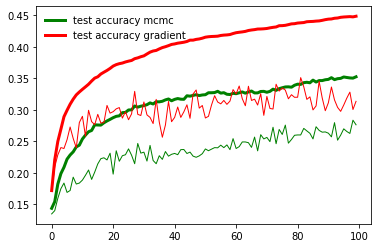

<Figure size 7200x14400 with 0 Axes>

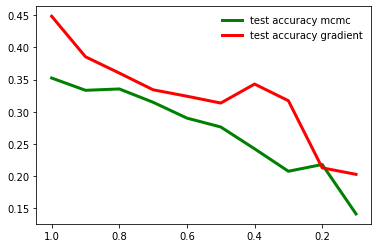

In [14]:
#json_file_mcmc = '../results/results_cnn_mcmc_proba.json'
#json_file_grad = '../results/results_cnn_gradient_proba.json'
#json_file_mcmc = '../results/results_cnn_mcmc_sparsindex_proba_1000000.json'
#json_file_grad = '../results/results_cnn_gradient_sparsindex_proba_0.001.json'
#json_file_mcmc = '../results/results_nets2_mcmc_proba.json'
json_file_mcmc = '../results/results_nets2_mcmc_proba_nnfull_vp8.json'
json_file_grad = '../results/results_nets2_gradient_proba.json'

results_mcmc = json.load(open(json_file_mcmc))
results_grad = json.load(open(json_file_grad))

epochs = len(results_mcmc.keys())
'''
for epoch in range(epochs):
    res = results[str(epoch)]
    print('--epoch'+str(epoch))
    for elt in res['sparse test']:
        print(elt['testing accuracy sparse'])
'''
x = sorted([int(t) for t in results_mcmc.keys()])
ac_test_mcmc = [ results_mcmc[str(t)]['test']['testing accuracy'] for t in x]
ac_test_grad = [ results_grad[str(t)]['test']['testing accuracy'] for t in x]


plt.figure(figsize=(100, 200))
fig, ax = plt.subplots()
ax.plot(x, ac_test_mcmc, label="test accuracy mcmc",color='g',linewidth=3)
ax.plot(x, ac_test_grad, label="test accuracy gradient",color='r',linewidth=3)

#style_lines = [(0, (5, 1)),(0, (5, 2)),(0, (5, 3)),(0, (5, 4))]
line_widths = [1,1,0.5]

for ind,proba in enumerate([4]):
    #print('proba=',0.1+0.1*proba)
    ac_test_sparse_mcmc = [results_mcmc[str(t)]['sparse test'][proba]['testing accuracy sparse'] for t in x]
    ac_test_sparse_grad = [results_grad[str(t)]['sparse test'][proba]['testing accuracy sparse'] for t in x]
    ax.plot(x, ac_test_sparse_mcmc,color='g',linewidth=line_widths[ind])#linestyle=style_lines[ind])
    ax.plot(x, ac_test_sparse_grad,color='r',linewidth=line_widths[ind])#linestyle=style_lines[ind])
ax.legend(loc="upper left", frameon=False)
plt.savefig("analysis_sparsindex.png",dpi=200)
plt.show()

plt.figure(figsize=(100, 200))
fig, ax = plt.subplots()

#perf without thresholding
sparseval_mcmc= [results_mcmc[str(99)]['test']['testing accuracy']]
sparseval_grad= [results_grad[str(99)]['test']['testing accuracy']]

sparseval_mcmc+=[results_mcmc[str(99)]['sparse test'][proba]['testing accuracy sparse'] for proba in range(9)]
sparseval_grad += [results_grad[str(99)]['sparse test'][proba]['testing accuracy sparse'] for proba in range(9)]
x = [1-elt*(1/10) for elt in range(10)]
ax.plot(x, sparseval_mcmc, label="test accuracy mcmc",color='g',linewidth=3)
ax.plot(x, sparseval_grad, label="test accuracy gradient",color='r',linewidth=3)
ax.set_xlim(ax.get_xlim()[::-1])

ax.legend(loc="upper right", frameon=False)
plt.savefig("analysis2_sparsindex.png",dpi=200)
plt.show()

## MCMC analysis of neighborhood size

Evaluating file ../results/results_nets2_mcmc_proba_fullnn.json started---


<Figure size 7200x14400 with 0 Axes>

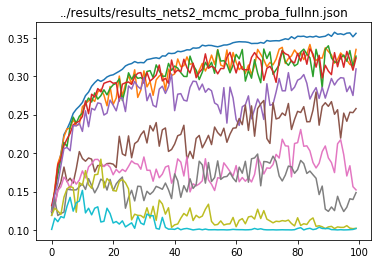

Evaluating file ../results/results_nets2_mcmc_proba_nn300.json started---


<Figure size 7200x14400 with 0 Axes>

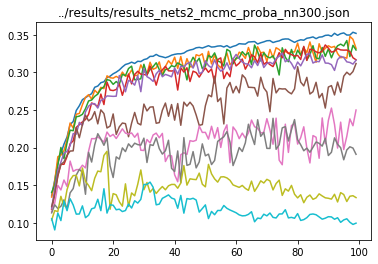

Evaluating file ../results/results_nets2_mcmc_proba_nn1000.json started---


<Figure size 7200x14400 with 0 Axes>

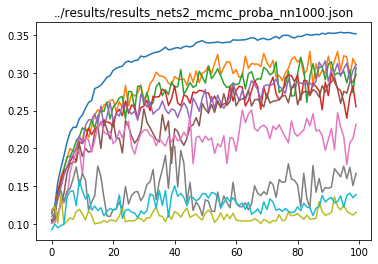

Evaluating the lossy compression of ../results/results_nets2_mcmc_proba_fullnn.json
Evaluating the lossy compression of ../results/results_nets2_mcmc_proba_nn1000.json
Evaluating the lossy compression of ../results/results_nets2_mcmc_proba_nn300.json
Evaluating the lossy compression of ../results/results_nets2_gradient_proba.json


<Figure size 7200x14400 with 0 Axes>

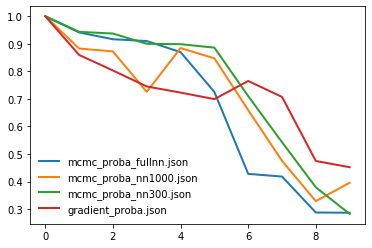

<Figure size 7200x14400 with 0 Axes>

<Figure size 7200x14400 with 0 Axes>

<Figure size 7200x14400 with 0 Axes>

<Figure size 7200x14400 with 0 Axes>

In [56]:
grad = '../results/results_nets2_gradient_proba.json'
full = '../results/results_nets2_mcmc_proba_fullnn.json'
nn300 = '../results/results_nets2_mcmc_proba_nn300.json'
nn1000 = '../results/results_nets2_mcmc_proba_nn1000.json'

for elt in [full, nn300, nn1000]:
    evaluation(elt,False)


plt.figure(figsize=(100, 200))
fig, ax = plt.subplots()

x = range(10)
for elt in [full, nn1000, nn300, grad]:
    ratio = lossycompression(elt,plot=False)
    ax.plot(x, ratio,label=elt[25:],linewidth=2)
    
ax.legend(loc="lower left", frameon=False)
plt.show()



In [228]:

class HeavyTail(object):
    """
    univariate student distribution
    """
    def __init__(self, s, R):
        """
        s : variance
        R : bound on the support distribution
        """
        self.R = R
        self.s = s
        self.d = 1 # univariate
        self.S = np.eye(1) * s
        # precomputing the normalization term for later use when computing data likelihood
        self.normalization = 3./(2*self.s*(1-1./pow(1+self.R/self.s,3)))

    def distribution(self, x):
        '''
        for use when computing the likelihood of multiples univariate variables
        '''
        if torch.sum(torch.abs(x)< self.R)  == torch.flatten(x).shape[0]:
            d = pow(torch.prod(1+torch.abs(x)/self.s)* self.normalization,4)
        else:
            d=0 
        return d

    def get_ratio(self, epsilon, params):
        """
        compute the likelihood ratio of two variables 
                 student(params[i] + epsilon[i])
        Prod_i (   ------------------------      )
                     student(params[i])
        """
        #apply the move to get theta tilde
        params_tilde = params + epsilon
        # get the likelihood of the theta
        den = self.distribution(params)
        den_tensor = (1+torch.abs(params)/self.s)*self.normalization
        # get the likelihood of the theta tilde
        num = self.distribution(params_tilde)
        num_tensor = (1+torch.abs(params_tilde)/self.s)*self.normalization
        ratio2 = torch.prod(den_tensor/num_tensor)
        print('num=',num,'den=',den)
        ratio = num / den
        return torch.min(ratio,torch.tensor(1,dtype=torch.float32)), torch.min(ratio2,torch.tensor(1,dtype=torch.float32)), params_tilde

In [17]:

class MLP(nn.Module):
    def __init__(self, sizes, act='relu'):
        """
        builds a multi layer perceptron
        sizes : list of the size of the different layers
        act : activation function either "relu", "elu", or "soft" (softmax)
        """
        if len(sizes)< 2:
            raise Exception("sizes argument is" +  sizes.__str__() + ' . At least two elements are needed to have the input and output sizes')
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        input_size = sizes[0]
        output_size = sizes[-1]
        self.linears = nn.ModuleList()
        for i in range(1, len(sizes)):
            self.linears.append(nn.Linear(sizes[i-1], sizes[i]))
        if act == 'soft':
            print('using softmax activation')
            self.activation = nn.Softmax()
        elif act =='elu':
            print('using elu activation')
            self.activation = nn.ELU()
        else:
            print('using Relu activation')
            self.activation = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        for linear in self.linears:
            x = linear(x)
            x = self.activation(x)
        return x


class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=11, stride=3, padding=0)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(32 * 8 * 8, 10)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        return x


def evaluate(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    return test_loss, correct


def evaluate_sparse(dataloader, model, loss_fn, threshold):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0
    sparse_weight = model.linear.weight.data*(torch.abs(model.linear.weight.data)>threshold)
    #sparse_bias = model.linear.bias.data[torch.abs(model.linear.bias.data)>threshold]
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            pred_s = []
            for x in X:
                #print(x.shape,sparse_weights.shape)
                y = torch.matmul(sparse_weights,torch.flatten(x))+model.linear.bias.data
                m = nn.ELU()
                output = m(y)
                pred_s.append(np.array(output))
            pred_s = torch.from_numpy(np.array(pred_s))
            test_loss += loss_fn(pred_s, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    return test_loss, correct


def loss(x,y):
    mse_loss = nn.MSELoss() 
    y = y.reshape((y.shape[0],1))
    y_onehot = torch.FloatTensor(x.shape[0], x.shape[1])
    y_onehot.zero_() 
    y_onehot.scatter_(1, y, 1)
    return mse_loss(x, y_onehot)

import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self,nb_filters):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=nb_filters, kernel_size=11, stride=3, padding=0)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(nb_filters * 8 * 8, 10)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(-1, nb_filters * 8 * 8)
        x = F.relu(self.fc1(x))
        return x

class ConvNet(nn.Module):
    def __init__(self,nb_filters,channels):
        super(ConvNet, self).__init__()
        self.nb_filters = nb_filters
        self.channels = channels
        if channels == 3:
            self.conv1 = nn.Conv2d(in_channels=channels, out_channels=nb_filters, kernel_size=11, stride=3, padding=0)
        else:
            self.conv1 = nn.Conv2d(in_channels=channels, out_channels=nb_filters, kernel_size=7, stride=3, padding=0)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(self.nb_filters * 8 * 8, 10)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(-1, self.nb_filters * 8 * 8)
        x = F.relu(self.fc1(x))
        return x


In [18]:
nb_filters = 64
model = ConvNet(nb_filters)

In [36]:
idx_col = 4
model.fc1.weight.data[idx_col].shape

tensor([ 0.0065, -0.0005, -0.0146,  ...,  0.0126,  0.0018,  0.0043])

In [29]:
square_size = 2
model.fc1.weight.data[4:4+square_size]

IndexError: index 4 is out of bounds for dimension 0 with size 2

In [256]:
type(13) == int

True

In [3]:
input_size = 3072 
output_size = 10
model = ConvNet()
model2 = MLP([3072,10])
if 'MLP' in str(type(model2)):
    print('yes')

using Relu activation
yes
